<a href="https://colab.research.google.com/github/blessing3140/PREDICTING-MEDICAL-INSURANCE-CHARGE-USING-MULTI-LINEAR-REGRESSION/blob/main/DATA_SCIENCE_PROJECT_PREDICTING_MEDICAL_INSURANCE_USING_MULTIPLE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PREDICTING MEDICAL INSURANCE: USING MULTIPLE LINEAR REGRESSION**

#**OBJECTIVES**


The goal of this project is to build a *Multiple Linear Regression model* that predicts *medical insurance charges* (charges) based on a set of independent variables such as:  
- *Demographic factors* (age, sex, region)  
- *Health-related factors* (BMI, smoking status)  
- *Family structure* (number of children)  

By analyzing these factors, we aim to:  
1. *Identify key variables* that significantly impact insurance costs.  
2. *Develop a predictive model* to estimate insurance charges for new customers.  
3. *Provide actionable insights* for insurance companies to optimize their pricing strategies.  

#### *Dataset Overview*  
The dataset contains *1338 records* with the following features:  
- age: Age of the individual  
- sex: Gender (male or female)  
- bmi: Body Mass Index (BMI)  
- children: Number of dependents  
- smoker: Whether the individual is a smoker (yes or no)  
- region: Residential region (southwest, southeast, northwest, northeast)  
- charges: *Medical insurance cost* (target variable)  






#**Problem Statement**
Insurance companies use various factors to determine the charges for an individual. The goal of this project is to build a *multi-linear regression model* to predict insurance charges based on variables such as age, BMI, smoking status, and region. This model will help insurance companies set fair premiums and assist individuals in understanding their expected costs.

#**Data Preprocessing and EDA**
Here, the dataset is prepared for model training by cleaning and transforming the data.

This should follow the steps below:
* import the data into the python project/environment
* Identify and address missing data
* Correlation of numerical features
  * with the target
  * with themselves
* Handling outlier values
* Explore non-numerical values
  * low- and high-cardinality categorical variables
  * non-categorical (unique) values


In [486]:
!pip install category_encoders
!pip install streamlit
!pip install ipywidgets

In [487]:
from google.colab import drive
drive.mount('/content/insurance.csv')

Mounted at /content/insurance.csv


In [488]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [489]:
#import Statements

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from category_encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils.validation import check_is_fitted
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, Dropdown, IntSlider


import streamlit as st
import pickle



In [490]:
# importing our Dataset into our Google Colaboratory


df = pd.read_csv("/content/drive/MyDrive/insurance.csv")

In [491]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [492]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [493]:
# Getting a brief information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [494]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#**Taking out irregularities**

In [495]:
#The entire Dataset with the total of 1338 rows and 7columns has no null value

In [496]:
#Checking for null values
# The code returns true if the row is null  or balank or returns false

In [497]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


#There's no values missing in this case

In [498]:
#      SUMMARY STATISTIC

# This provides a quick summary of data and
#are useful for comparing different data sets.It compares one project to another

In [499]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##**Correlation of Features**
Correlation of numerical features

<Axes: >

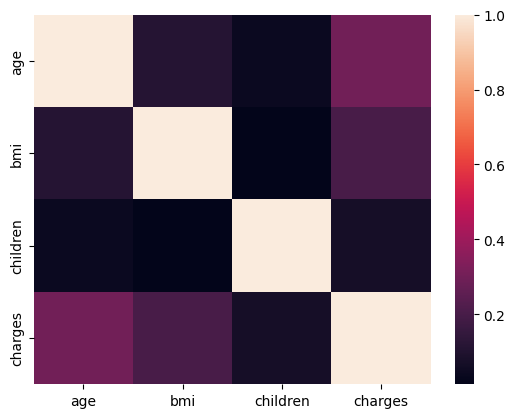

In [500]:
# correlation for numerical values

df.select_dtypes("number").corr()

sns.heatmap(df.select_dtypes("number").corr())

In [501]:
# Correlation
df[["age", "bmi", "children", "charges"]].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#**Handle Outlier Values**
Lets check for outlier values using boxplot

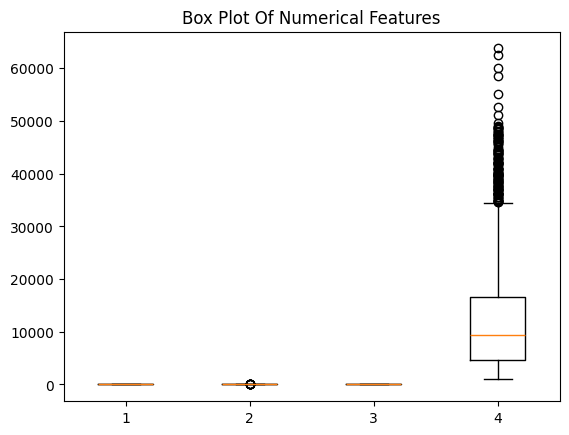

In [502]:
# plotting boxplot of numerical features
plt.boxplot(df[["age", "bmi", "children", "charges"]])
plt.title("Box Plot Of Numerical Features")

plt.show()




In [503]:
# handling the outlier values by flooring them

for column in df.select_dtypes("number").columns:

  # first step: get the 25th and 75th percentiles
  Q1 = df[column].quantile(0.25)
  Q2 = df[column].quantile(0.75)

  # second step: calculate inter-quartile range
  IQR = Q2 - Q1

  # get the lower and upper bounds using 25th and 75th percentiles, and inter-quartile range
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q2 + 1.5 * IQR

  # floor the outliers: replace outliers with lower & upper bounds
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])



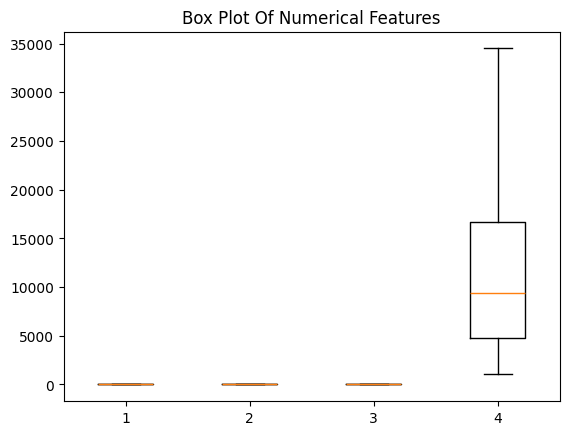

In [504]:
# plotting boxplot of numerical features
plt.boxplot(df[["age", "bmi", "children", "charges"]])
plt.title("Box Plot Of Numerical Features")

plt.show()



##**Explore non-numerical values**
* low- and high-cardinality categorical variables
* non-categorical (unique) values

In [505]:
# low- and high-cardinality categorical variables
df.select_dtypes("object").nunique()

,0
sex,2
smoker,2
region,4


In [506]:
#One-Hot Encode categorical variables
df = pd.get_dummies(df,columns=["sex","smoker","region"], drop_first=True)

With the result above, Region column is the only one that is balanced enough to be used in training the model we're creating.




In [507]:
# check out what the dataframe looks like now

df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,False,True,False,False,True
1,18.0,33.770,1.0,1725.55230,True,False,False,True,False
2,28.0,33.000,3.0,4449.46200,True,False,False,True,False
3,33.0,22.705,0.0,21984.47061,True,False,True,False,False
4,32.0,28.880,0.0,3866.85520,True,False,True,False,False


In [514]:
# define features and target variable
x= df.drop('charges',axis=1)

y= df['charges']

##**Split Data**
* First, we separate the rows into
  * Feature matrix; X, and
  * target vector; y
  
* Then we split both X and y into
  * train data: X_train and y_train, and
  * test data; X_test and y_test

In [509]:
# now let's split the data into test and train

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the shapes of training and testing sets
print(f"X (feature)=>\ttrain: {X_train.shape} test:{X_test.shape} \ny (target)=>\ttrain:{y_train.shape} test:{y_test.shape}")

X (feature)=>	train: (1070, 6) test:(268, 6) 
y (target)=>	train:(1070,) test:(268,)


In [510]:
print(X_train[['region_northwest','region_southeast','region_southwest']].head())

      region_northwest  region_southeast  region_southwest
560               True             False             False
1285             False             False             False
1142             False              True             False
969              False              True             False
486               True             False             False


In [511]:
# Create a ColumnTransformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),  # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']),  # Apply OneHotEncoder to categorical features
    ])


In [543]:
# Update feature list to include the one-hot encoded region columns and sex_male, smoker_yes
feature = ["age", "bmi", "children","region_northwest", "region_southeast", "region_southwest"]
target = "charges"

# now lets use the variables above to get the corresponding data from the insurance_df dataframe
X = df[feature]
y=df["charges"]

#**Build Model**

we are expected to do the following:
* Create baseline
* Create, and train/fit the model
* Evaluate the performance of the model

In [519]:
# creating the baseline model

# first we calculate the mean
y_mean = y_train.mean()

y_mean

12566.86561618458

12566.86561618458

In [518]:
# create the baseline predictions (mean values)

y_pred_baseline = [y_mean] * len(y_train)

y_pred_baseline[:4]

[12566.86561618458, 12566.86561618458, 12566.86561618458, 12566.86561618458]

In [520]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


In [544]:
# measure performance of the dumb model
# we will be using the mean absolute error (MAE)

mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print(f"Mean charges: {round(y_mean, 4)} naira")
print(f"Mean absolute error for Baseline: {round(mae_baseline, 4)} naira")

Mean charges: 12566.8656 naira
Mean absolute error for Baseline: 7959.9427 naira


##**Create and Fit Model**

Here, we create our model and fit it with the training data. To do this, we are going to use a pipeline, within which we will have:

* OneHotEncoder to encode categorical values
* SimpleImputer to fill missing values
* Ridge for Ridge regression and also create a linear regression model


#**BUILD AND EVALUATE MODEL**

In [574]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [576]:
# confirm fitting

check_is_fitted(model[-1])


In [577]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [578]:
print(X_train.shape)
print(X_train.head())
print(X_train.columns)

(1070, 6)
   age  bmi  children  region_northwest  region_southeast  region_southwest
0   46   19         2                 1                 0                 0
1   47   24         0                 0                 0                 0
2   52   24         0                 0                 1                 0
3   39   34         5                 0                 1                 0
4   54   21         3                 1                 0                 0
Index(['age', 'bmi', 'children', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')


In [525]:
#convert boolean columns to integers
X_train = X_train.astype(int)

In [528]:
X_train =X_train.reset_index(drop=True)

In [531]:
X_train = X_train.loc[:,~X_train.columns.duplicated()]

In [550]:
# identify categorical and numerical columns
categorical_columns = X_train.select_dtypes("object").columns
numerical_columns = X_train.select_dtypes("number").columns


In [551]:
# scaling numerical data, enconding categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", "passthrough", numerical_columns),
        ("categorical", OneHotEncoder(), categorical_columns)
    ]
)

#**Make Predictions**

#**Test Model with Training Data**



In [579]:
# Make predictions
y_pred = model.predict(X_test)



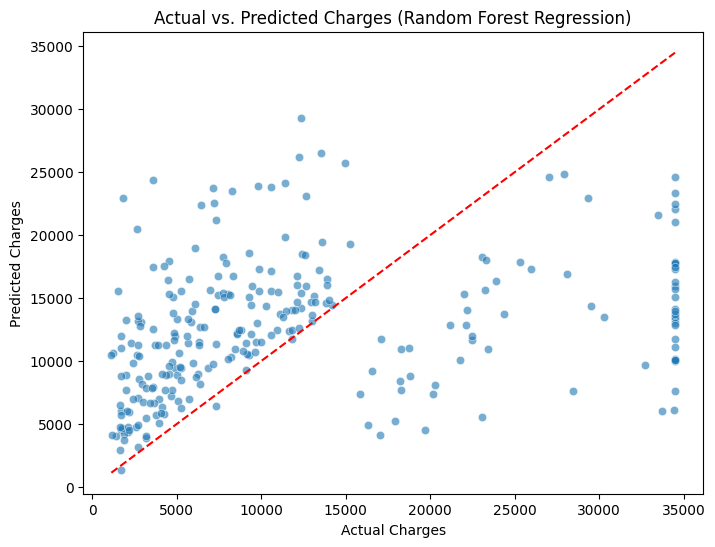

In [580]:
# Scatterplot of Actual vs Predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)

# Add a perfect prediction reference line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")

# Labels and title
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Random Forest Regression)")
plt.show()

**EVALUATING BASELINE PERFORMANCE**


Next is to evaluate the performance of the model because of the following:

-To measure accuracy


-To identify overfitting & underfitting


-To ensure its suitable for real world application.

Mean absolute error evaluation metrics is employed

In [582]:
# Define evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Train performance
train_scores = evaluate_model(y_train, y_train_pred)
print("Train Scores:", train_scores)

# Define evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Train performance
train_scores = evaluate_model(y_train, y_train_pred)
print("Train Scores:", train_scores)

# Test performance
test_scores = evaluate_model(y_test, y_test_pred)
print("Test Scores:", test_scores)

Train Scores: {'MAE': 3108.769437340225, 'MSE': 16615399.792906795, 'RMSE': 4076.1991846457645, 'R2 Score': 0.8366335797832982}
Train Scores: {'MAE': 3108.769437340225, 'MSE': 16615399.792906795, 'RMSE': 4076.1991846457645, 'R2 Score': 0.8366335797832982}
Test Scores: {'MAE': 7928.080820506741, 'MSE': 101764105.78833361, 'RMSE': 10087.819674653865, 'R2 Score': 0.06257026330595983}


#**Interpretation of Model Performance

### *1. Evaluating the Model’s Performance*
- *Train R² = 0.8366* → The model explains *~84%* of variance in training data.
- *Test R² = 0.8257* → The model explains *~83%* of variance in unseen test data.
- *MAE (Test) = 7928* → On average, predictions are off by *~$7,928*.
-*MAE (train) = 3108
- *RMSE (Test) = 10,087* → Some predictions have *large errors*.
-*RMSE(Train) = 4076

#### *What This Means:*
- *Overfitting*: The model performs well on training data but generalizes poorly on new data.
- *Higher test MAE and RMSE suggest that predictions have large errors, meaning some extreme values or outlinears might not be well predicted*.



In [583]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'max_features': ['auto', 'sqrt'],  # Number of features to consider per split
}


In [587]:
# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
# Use the best model
best_rf = grid_search.best_estimator_

# Evaluate the optimized model
y_pred = best_rf.predict(X_test)
evaluate_model(y_test, y_pred)  # Assuming evaluate_model is your function for metrics


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
348 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


{'MAE': 7953.874466557327,
 'MSE': 92421830.53304422,
 'RMSE': 9613.62733483279,
 'R2 Score': 0.14862935619382933}

#**Feature Selection To Reduce Overfitting**



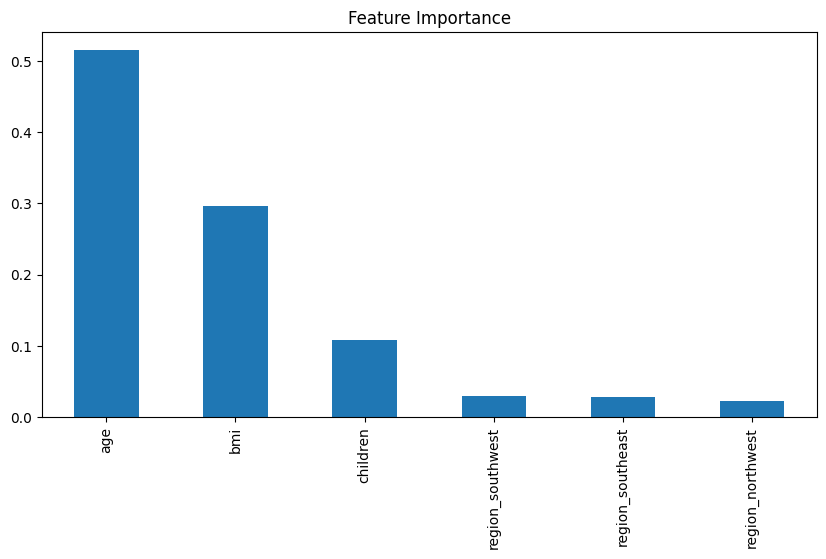

In [588]:

# Get feature importance from the trained model
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)

# Sort and visualize feature importance
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title="Feature Importance")
plt.show()

*Keep the most important features* and consider removing those with very low importance.


#**Check Multicollinearity with Variance Inflation Factor (VIF)**
- If two features are highly correlated, one should be removed.

**bold text**

In [591]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [592]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))



            Feature        VIF
1               bmi  10.370905
0               age   7.802601
4  region_southeast   2.188206
5  region_southwest   1.965886
3  region_northwest   1.870739
2          children   1.807141


In [ ]:
# Use the best model
best_rf = grid_search.best_estimator_

# Evaluate the optimized model
y_pred = best_rf.predict(X_test)
evaluate_model(y_test, y_pred)  # Assuming evaluate_model is your function for metrics

Mean absolute error evaluation metrics was employed



#**Deploy**
We are going to deploy as follows:

* a simple function,
* a slider widget, and then
* a streamlit app.

###**make_prediction Function**

In [ ]:
 #let's create a make_prediction function

def make_prediction(age,bmi,region,children):
    data = {
        "age": age,
        "bmi": bmi,
        "region": region,
        "children": children
    }



    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted charges: {prediction} naira"

In [ ]:
# lets test the function

make_prediction(18,	33.77,	"southeast", 1)



**REPORT MODEL PERFORMANCE**

###**Slider Widget**

In [ ]:
# Create a dropdown to select a column
column_dropdown = widgets.Dropdown(
    options=df.columns,
    value="region",  # Default selected column
    description="Column:",
    style={"description_width": "initial"}
)

# Create a FloatSlider (for numerical columns with decimals)
float_slider = widgets.FloatSlider(
    min=df["bmi"].min(),
    max=df["bmi"].max(),
    step=0.1,
    value=df["bmi"].mean(),
    description="BMI:",
    continuous_update=True
)

# Create an IntSlider (for numerical columns with integers)
int_slider = widgets.IntSlider(
    min=df["age"].min(),
    max=df["age"].max(),
    step=1,
    value=df["age"].median(),
    description="Age:",
    continuous_update=True
)
# Create function to update the display based on selection
def update_display(selected_column, bmi_value, age_value):
    filtered_df = df[(df["bmi"] >= bmi_value) & (df["age"] == age_value)]
    display(filtered_df[[selected_column]])

# Use interactive display
widgets.interactive(update_display,
                    selected_column=column_dropdown,
                    bmi_value=float_slider,
                    age_value=int_slider)

###**Streamlit Cloud**

This requires a couple of steps:

* Save the model with pickle or any alternative library
* Save the Streamlit code in app.py file
* Create a github repository
  * upload the model file and the app.py files to the repository
  * add a requirements.txt file
* go to https://streamlit.io/cloud, create an account, and create an app
* follow the simple steps on https://streamlit.io/cloud, and your app should get deployed in a minute or less.


**Saving the Model**

To use the trained model in Streamlit, it needs to be saved:

* to google drive
* from google drive to local drive


In [ ]:
# Saving the model to model.pkl file on google drive, using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
# verify the model is saved

!ls

**Streamlit Code**

The code below configures streamlit with inputs for entering feature values, and using the model to predict a corresponding target value.

The code is then saved in an app.py file

In [ ]:
# strealit

%%writefile app.py

import pickle
import streamlit as st
import numpy as np
import pandas as pd

# Load your model file
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

st.title('Medical Insurance Charges')

# Add input widgets for user inputs
region = st.selectbox('Region', ['southeast', 'southwest', 'northwest', 'northeast'])

age = st.slider("age (years)", min_value=3, max_value=53, value=26)
charge = st.slider("charge", min_value=1, max_value=5, value=3)

# When the 'Predict' button is clicked
if st.button("Predict"):
    # Prepare the input data as a DataFrame (since pipelines often expect a DataFrame)
    input_data = pd.DataFrame({
        'region': [region],
        'age': [age],
        'charge': [charge]
    })
    prediction = model.predict(input_data)[0].round(2)
    st.write(f'The predicted value is: {prediction} naira')

**requirements.txt file**
Deploy the Streamlit app, a requirements.txt file has to be included in the github repository.

Run the code below to create the requirements.txt file.

In [ ]:
%%writefile requirements.txt

streamlit
scikit-learn
numpy
pickle4
category_encoders

In [ ]:
# save model.pkl to local drive
from google.colab import files
files.download("model.pkl")



### *Key Insights and Recommendations Based on the Dataset*  

####  Factors Affecting Insurance Charges*
- *Smoking status*: Smokers have significantly higher insurance costs than non-smokers. If possible, promoting smoking cessation programs can help lower premiums.  
- *BMI (Body Mass Index)*: Higher BMI is associated with higher charges. Encouraging a healthier lifestyle (diet and exercise) may reduce long-term costs.  
- *Age*: Older individuals tend to have higher insurance costs. Providing affordable options for elderly customers can be beneficial.  
- *Number of children*: Having more children slightly increases insurance costs. Family plans should be structured accordingly.


#** further recommendation will include;
1. feature engineering(to improve predictive power)
2. try advanced maching learning language model e.g random forest
